# Titanic Introduction to Machine Learning 

Inside this notebook you will find all the code used in my [medium/blog post.](https://medium.com/@tomas.ertola/introducci%C3%B3n-a-machine-learning-para-principiantes-9aee97cc77f) <br>

**Important:** in order to run the last line in the notebook to upload your submission to kaggle

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Analysis

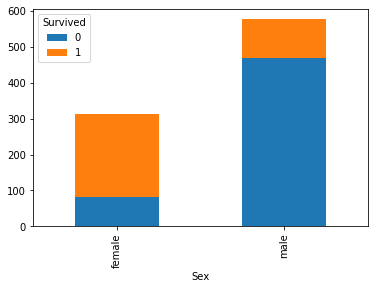

In [4]:
plot = train.groupby(['Sex','Survived']).size().reset_index().pivot(columns='Survived', index='Sex', values=0)
plot.plot(kind='bar', stacked=True)

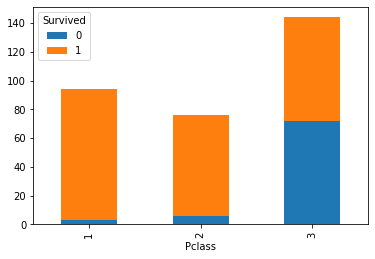

In [5]:
plot = train[train.Sex == 'female'].groupby(['Pclass', 'Survived']).size().reset_index().pivot(
    columns='Survived', index='Pclass', values=0)

plot.plot(kind='bar', stacked=True)

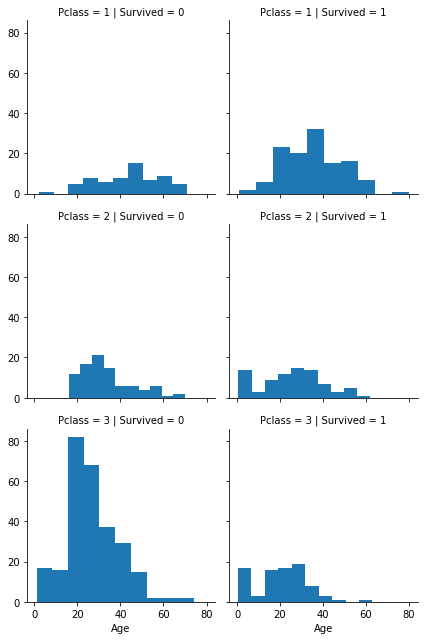

In [6]:
group = train[train.Sex == 'female']
g = sns.FacetGrid(train, col='Survived', row='Pclass')
g = g.map(plt.hist, 'Age')

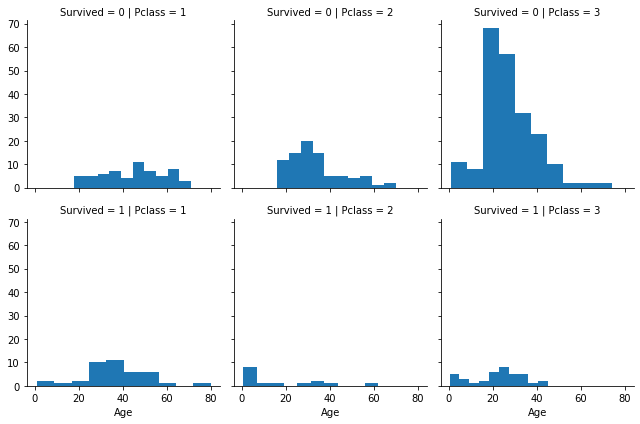

In [7]:
g = sns.FacetGrid(train[train.Sex=='male'], col='Pclass', row='Survived')
g = g.map(plt.hist, 'Age')

# Filling NA values

In [8]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
train.shape

(891, 12)

In [11]:
test.shape

(418, 11)

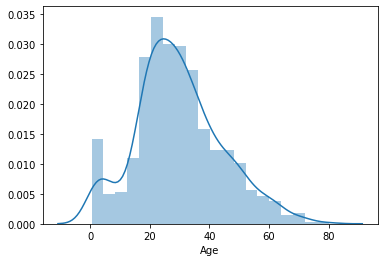

In [12]:
sns.distplot(train['Age'])

In [13]:
train['Age'].mean()

29.69911764705882

In [14]:
train['Age'].fillna(value=train['Age'].mean(), inplace=True)
test['Age'].fillna(value=test['Age'].mean(), inplace=True)

In [15]:
train['Sex'] = train['Sex'].map({'male': '0', 'female':'1'})
test['Sex'] = test['Sex'].map({'male': '0', 'female':'1'})

# Model Fit

In [16]:
from sklearn.ensemble import RandomForestClassifier

features = ['Age','Sex','Pclass']

model_clf = RandomForestClassifier()

In [17]:
model_clf.fit(train[features], train['Survived'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [18]:
from sklearn.metrics import accuracy_score

predict_train = model_clf.predict(train[features])
accuracy_score(train['Survived'], predict_train)

0.8799102132435466

# Uploading results to kaggle

In [19]:
def upload_sub(prediction, test_df):
    output = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': prediction})
    output.to_csv('my_sub.csv', index=False)
    !kaggle competitions submit -c titanic -f my_sub.csv -m test

In [21]:
prediction_test = model_clf.predict(test[features])

upload_sub(prediction_test, test)

100%|██████████████████████████████████████| 2.77k/2.77k [00:02<00:00, 1.11kB/s]
Successfully submitted to Titanic: Machine Learning from Disaster